# **Welcome! In this notebook, we'll solve Homework 1.9 together in Python.**

First, we'll import the most common Python data science libraries, along with sklearn, which handles implementation of the KNN algorithm.

In [1]:
#For data science
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#For KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

#For utility
import random
import math

We need to generate two sets of points in two different circles for this problem. To do so, we need a way to generate data in a circle.

Below, we define a method to do so in a relatively uniform way. The general idea is to change the problem into polar coordinates, so that we can pick an angle and radius, and yield a point in the circle randomly. 

(The issue of uniformity of the data is solved by taking the square root of the random scaling of the radius - this is mostly an unimportant technical point, and not worth focusing on here.)

In [2]:
def genPointsInCircle(radius, centerX, centerY, classNum, numPoints):
    
    #We want to return a list of the points we generate.
    points = []

    #We generate as many points as needed by the below method.
    for _ in range(numPoints):
        
        #Pick a random angle in radians.
        theta = random.uniform(0, 2* math.pi)
        
        #Pick a random scaling factor of the radius, between 0 and 1.
        r = radius * math.sqrt(random.uniform(0, 1))
        
        #Calculate x and y by converting polar coordinates to Euclidean.
        x = round(r * math.cos(theta) + centerX, 5)
        y = round(r * math.sin(theta) + centerY, 5)

        #Store our point in our list.
        points.append([x,y, classNum])


    return points

Now, we can generate our data in our 2 desired classes! We choose to generate 100 points from each class for this example.

In [3]:
#Generate 100 class 1 points in the circle centered at (3,4) with r = 2
class1Points = genPointsInCircle(2, 3, 4, 1, 100)

#Generate 100 class 2 points in the circle centered at (0,0) with r = 3/2
class2Points = genPointsInCircle(1.5, 0, 0, 2, 100)

#Combine these lists in a DataFrame.
data = pd.DataFrame(class1Points + class2Points)

As a best practice, let's look at our data we've constructed.

In [4]:
data

,0,1,2
0,3.79406,3.27802,1
1,4.18463,3.18786,1
2,2.58692,2.85598,1
3,2.77199,3.77162,1
4,3.98011,3.85748,1
...,...,...,...
195,-0.43452,1.13427,2
196,-0.34228,1.35522,2
197,1.32811,0.38623,2
198,-0.23903,-0.60566,2


Looks good! We have to remember the third column is the class label - this will be important for testing a KNN algorithm on the data.

Now, we want to split our data into a train and test set, and separate the data into the points and the labels. Most of the hard work is accomplished by sklearn, which will split our data randomly when we provide the needed parameters.

In [5]:
#Create a dataframe of only the points.
X = data.drop([2], axis=1)

#Create a dataframe of only the associated labels.
y = data[2]

#Call the sklean train_test_split method to break 30% of our data
#into a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Let's see what this method did by plotting our points.

Blue points will be from Class 2, orange points from Class 1, and black points are points in the test set our classifier will be trying to label.

Text(0, 0.5, 'y')

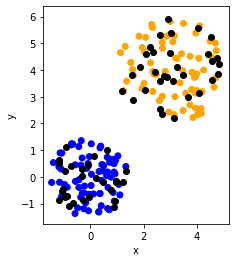

In [6]:
fig, ax = plt.subplots()
colors = {1:'orange', 2:'blue'}
ax.scatter(X_train[0], X_train[1], c = y_train.map(colors))
ax.scatter(X_test[0], X_test[1], c = 'black')
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')

Now we can create and train a classifier! This is remarkably easy with sklearn.

We choose to examine the 3 nearest neighbors for this computation.

In [7]:
#Create a KNN classifier from sklearn.
KNNClassifier = KNeighborsClassifier(n_neighbors=3)

#Train the classifier on the training set.
KNNClassifier.fit(X_train, y_train)

#Get predictions from the classifier for the test set.
y_pred = KNNClassifier.predict(X_test)

Now, we want to compare the performance of our algorithm - how did it do?

We use one more method from sklearn to accomplish this.

In [8]:
#Get a classification report to see the results.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Wow! Even with $K = 3$, our classifier was perfect. This dataset was certainly conducive to this type of classification, so perhaps this isn't too much of a surprise. Either way, we can call that success for Problem 9!

***

Thanks for reading, and feel free to email me with any questions!

-Charles